In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture

In [4]:
df1 = pd.read_csv('/Users/Haleigh/Documents/MSDS/Adv_ML/Final_Project_CL_HS/datasets/bcsc_risk_factors_expanded1.csv')
df2 = pd.read_csv('/Users/Haleigh/Documents/MSDS/Adv_ML/Final_Project_CL_HS/datasets/bcsc_risk_factors_expanded2.csv')
df3 = pd.read_csv('/Users/Haleigh/Documents/MSDS/Adv_ML/Final_Project_CL_HS/datasets/bcsc_risk_factors_expanded3.csv')

In [5]:
df = pd.concat([df1, df2, df3])

In [6]:
df.shape

(6788436, 12)

In [7]:
df.head()

,year,age_group_5_years,race_eth,first_degree_hx,age_menarche,age_first_birth,BIRADS_breast_density,current_hrt,menopaus,bmi_group,biophx,breast_cancer_history
0,2013,7,1,0,9,3,1,1,2,3,0,0
1,2013,7,1,0,9,3,1,1,2,3,0,0
2,2013,7,1,0,9,3,1,1,2,3,0,0
3,2013,7,1,0,9,3,1,1,2,3,0,0
4,2013,7,1,0,9,3,1,1,2,3,0,0


## Drop unknowns

In [8]:
df = df[df.ne(9).all(1)]
df.shape

(1232950, 12)

In [9]:
df.breast_cancer_history.value_counts()


breast_cancer_history
0    1161727
1      71223
Name: count, dtype: int64

<Axes: xlabel='breast_cancer_history'>

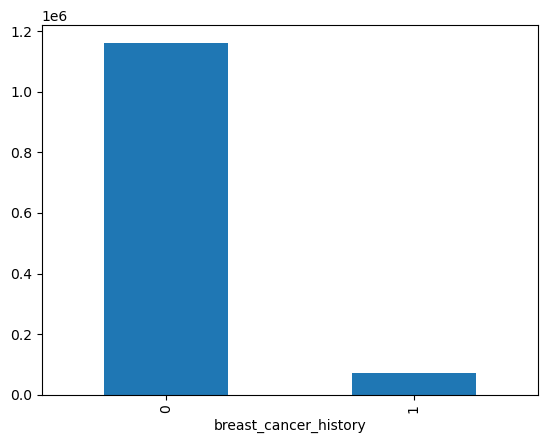

In [10]:
df.breast_cancer_history.value_counts().plot(kind='bar')

## GMM

In [11]:
df_data = df.drop(['breast_cancer_history', 'year'], axis=1).copy()

In [12]:
df_data

,age_group_5_years,race_eth,first_degree_hx,age_menarche,age_first_birth,BIRADS_breast_density,current_hrt,menopaus,bmi_group,biophx
15100,7,1,1,0,0,1,0,2,3,0
15101,7,1,1,0,0,1,0,2,3,0
15102,7,1,1,0,0,1,0,2,4,1
15103,7,1,1,0,0,1,0,3,2,1
15104,7,1,1,0,0,1,0,3,4,0
...,...,...,...,...,...,...,...,...,...,...
2206280,7,1,0,2,4,4,1,2,1,0
2206281,7,1,0,2,4,4,1,2,1,1
2206282,7,1,0,2,4,4,1,2,2,0
2206283,7,1,0,2,4,4,1,2,2,0


Text(0.5, 0, 'Number Of Components')

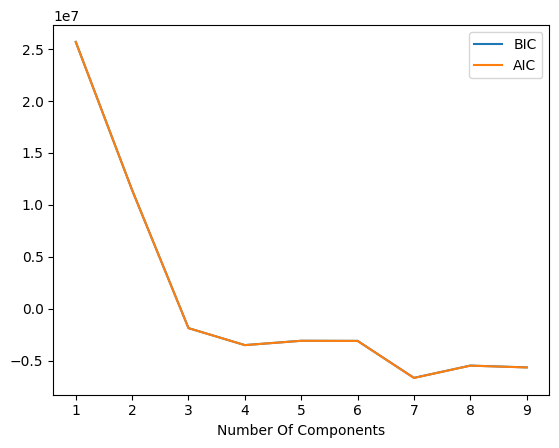

In [40]:
#Prepare
n_component = np.arange(1,10)

#Create GGM Model
models = [GaussianMixture(n_components = n,
                          random_state=42).fit(df_data) for n in n_component]
#Plot
plt.plot(n_component,
         [m.bic(df_data) for m in models],
         label = 'BIC')
plt.plot(n_component,
         [m.aic(df_data) for m in models],
         label = 'AIC')
plt.legend()
plt.xlabel("Number Of Components")

In [41]:
# create GM Models
model = GaussianMixture(n_components=7,
                        random_state=42).fit(df_data)
cluster = pd.Series(model.predict(df_data))
df['cluster'] = cluster
df

,year,age_group_5_years,race_eth,first_degree_hx,age_menarche,age_first_birth,BIRADS_breast_density,current_hrt,menopaus,bmi_group,biophx,breast_cancer_history,cluster
15100,2013,7,1,1,0,0,1,0,2,3,0,0,3.0
15101,2013,7,1,1,0,0,1,0,2,3,0,0,3.0
15102,2013,7,1,1,0,0,1,0,2,4,1,0,3.0
15103,2013,7,1,1,0,0,1,0,3,2,1,0,3.0
15104,2013,7,1,1,0,0,1,0,3,4,0,0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2206280,2013,7,1,0,2,4,4,1,2,1,0,0,NaN
2206281,2013,7,1,0,2,4,4,1,2,1,1,0,NaN
2206282,2013,7,1,0,2,4,4,1,2,2,0,0,NaN
2206283,2013,7,1,0,2,4,4,1,2,2,0,0,NaN


In [42]:
df.cluster.value_counts()

cluster
3.0    260759
2.0    204392
0.0     69896
5.0     38297
4.0     36203
6.0     14186
1.0      2189
Name: count, dtype: int64

In [22]:
model.bic

<bound method GaussianMixture.bic of GaussianMixture(n_components=4, random_state=42)>

In [33]:
gmm_model_comparisons=pd.DataFrame({"n_components" : 4,
                                  "BIC" : [m.bic(df.loc[:, df.columns != 'breast_cancer_history']) for m in models],
                                   "AIC" : [m.aic(df.loc[:, df.columns != 'breast_cancer_history']) for m in models]})


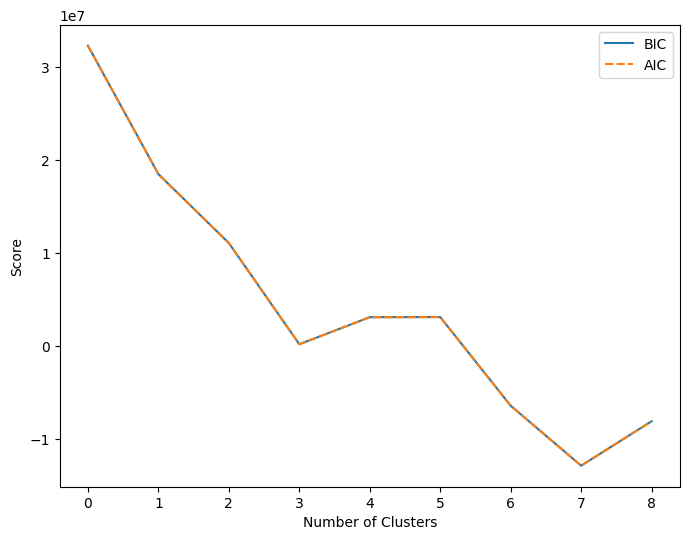

In [34]:
plt.figure(figsize=(8,6))
sns.lineplot(data=gmm_model_comparisons[["BIC","AIC"]])
plt.xlabel("Number of Clusters")
plt.ylabel("Score")
plt.savefig("GMM_model_comparison_with_AIC_BIC_Scores_Python.png",
                    format='png',dpi=150)